In [187]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Step 1. Load data as a pd DataFrame.

Ideal structure of the dataframe: article, qid, category, description.

In [179]:
df = pd.read_csv('unique_health_articles.csv')

In [180]:
df.tail()

,Unnamed: 0,article,qid,total_pageviews,description,category
878,878,Yoga_as_exercise,Q65091595,4324,physical activity consisting mainly of yoga poses,High-importance
879,879,Young_Living,Q18067581,2947,American multi-level marketing company,Low-importance
880,880,Zero_emission_zone,Q647266,1016,defined area,High-importance
881,881,Zumba,Q229680,42089,dance fitness program,Mid-importance
882,882,Zyzz,Q2618609,1448376,Russian-born Australian bodybuilder and Intern...,Mid-importance


In [182]:
df.head()

,Unnamed: 0,article,qid,total_pageviews,description,category
0,0,1977_NestlÃ©_boycott,Q1498774,27259,boycott,Low-importance
1,1,2007_tuberculosis_scare,Q4609852,550,international health scare,Low-importance
2,2,2011_United_States_listeriosis_outbreak,Q4622783,871,disease outbreak in the United States,Low-importance
3,3,2014_California_Proposition_46,Q119129906,153,NaN,Low-importance
4,4,24_Hour_Fitness,Q4631849,1122,US fitness center chain,Low-importance


In [183]:
classifier_df = df[df['category'] != 'Unknown-importance']
classifier_df.category.describe()

count                750
unique                 3
top       Low-importance
freq                 472
Name: category, dtype: object

# Step 2: Feature Engineering.

We want features: total_pageviews, page_size, reivisions_since_2024, incoming_number, outgoing_number.

In [ ]:
onlyFeatures = classifier_df[["total_pageviews", "page_size", "incoming_links", "outgoing_links", "num_editors", "article_age", "total_revisions", "total_translations", "unique_days_viewed"]]
onlyFeatures.head()

,total_pageviews,page_size,revisions_since_2024,incoming_number,outgoing_number
0,27259,NaN,0,0,0
1,550,16565.0,13,41,83
2,871,23708.0,13,228,305
3,153,5373.0,5,957,1046
4,1122,21019.0,53,88,88


There are NA values, which we need to get rid of.

In [93]:
onlyFeatures = onlyFeatures.fillna(0)

Create a dictionary of features.

In [94]:
dfDict = onlyFeatures.to_dict('records')
dfDict[:5]

[{'total_pageviews': 27259,
  'page_size': 0.0,
  'revisions_since_2024': 0,
  'incoming_number': 0,
  'outgoing_number': 0},
 {'total_pageviews': 550,
  'page_size': 16565.0,
  'revisions_since_2024': 13,
  'incoming_number': 41,
  'outgoing_number': 83},
 {'total_pageviews': 871,
  'page_size': 23708.0,
  'revisions_since_2024': 13,
  'incoming_number': 228,
  'outgoing_number': 305},
 {'total_pageviews': 153,
  'page_size': 5373.0,
  'revisions_since_2024': 5,
  'incoming_number': 957,
  'outgoing_number': 1046},
 {'total_pageviews': 1122,
  'page_size': 21019.0,
  'revisions_since_2024': 53,
  'incoming_number': 88,
  'outgoing_number': 88}]

Now we can vectorize.

In [95]:
from sklearn.feature_extraction import DictVectorizer
import numpy as np
vec = DictVectorizer(sparse=False, dtype=np.int64)

In [96]:
X = vec.fit_transform(dfDict)

In [97]:
dfVectors = pd.DataFrame(X.tolist(),  # the data for the dataframe is a list of lists
                         columns=vec.get_feature_names_out()) # a list of feature names
dfVectors.head()

,incoming_number,outgoing_number,page_size,revisions_since_2024,total_pageviews
0,0,0,0,0,27259
1,41,83,16565,13,550
2,228,305,23708,13,871
3,957,1046,5373,5,153
4,88,88,21019,53,1122


In [101]:
dfLabels = classifier_df[['article','qid', 'category']]

In [99]:
dfFinal = pd.concat([dfLabels, dfVectors], axis=1)
dfFinal.head()

,article,qid,category,incoming_number,outgoing_number,page_size,revisions_since_2024,total_pageviews
0,1977_NestlÃ©_boycott,Q1498774,Low-importance,0.0,0.0,0.0,0.0,27259.0
1,2007_tuberculosis_scare,Q4609852,Low-importance,41.0,83.0,16565.0,13.0,550.0
2,2011_United_States_listeriosis_outbreak,Q4622783,Low-importance,228.0,305.0,23708.0,13.0,871.0
3,2014_California_Proposition_46,Q119129906,Low-importance,957.0,1046.0,5373.0,5.0,153.0
4,24_Hour_Fitness,Q4631849,Low-importance,88.0,88.0,21019.0,53.0,1122.0


In [103]:
dfFinal.to_csv("classifier_data.csv")

# Step 3: Train/test splitting.

In [84]:
from sklearn.model_selection import train_test_split

In [104]:
classifier_df = classifier_df.fillna(0)

X is a MATRIX Of features.

In [106]:
X = classifier_df[["total_pageviews", "page_size", "revisions_since_2024", "incoming_number", "outgoing_number"]]
X.head()

,total_pageviews,page_size,revisions_since_2024,incoming_number,outgoing_number
0,27259,0.0,0,0,0
1,550,16565.0,13,41,83
2,871,23708.0,13,228,305
3,153,5373.0,5,957,1046
4,1122,21019.0,53,88,88


In [107]:
classifier_df.shape

(750, 9)

y is the value (level of importance) we're trying to predict.

In [108]:
y = classifier_df['category']
y.shape

(750,)

In [169]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                      test_size=0.1,  
                                                      random_state=42) 

# Step 4: Multinominal logistic regression.

Create an instance of the model.

In [186]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

Fit the model.

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_test, y_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Step 3: Decision tree classifier.

In [151]:
from sklearn import tree

In [137]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
clf

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [170]:
clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [171]:
clf.score(X_test, y_test)

0.64

This accuracy is quite concerningly low.

In [172]:
tree.plot_tree(clf, fontsize=11)

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got LogisticRegression() instead.

# Step 4: kNN classifier.

In [117]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier() # Step 1: Build the classifier
knn

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [118]:
knn.n_neighbors

5

In [173]:
knn.fit(X_train, y_train) # Step 2: Fit the classifier
knn.score(X_test, y_test) # Step 3: Score (validate) the classifier

0.64

kNN is just worse, but did MUCH better when I increased the train size to 0.95?

In [174]:
predicted = knn.predict(X_test)

# show the predicted and true labels together:
print(list(zip(predicted, y_test)))

[('Low-importance', 'Low-importance'), ('High-importance', 'High-importance'), ('Low-importance', 'Low-importance'), ('High-importance', 'High-importance'), ('Low-importance', 'Low-importance'), ('Low-importance', 'Low-importance'), ('High-importance', 'Mid-importance'), ('Low-importance', 'Low-importance'), ('Low-importance', 'Low-importance'), ('Low-importance', 'Low-importance'), ('Mid-importance', 'High-importance'), ('Low-importance', 'Mid-importance'), ('High-importance', 'Mid-importance'), ('Low-importance', 'Low-importance'), ('High-importance', 'High-importance'), ('Low-importance', 'Low-importance'), ('Low-importance', 'Low-importance'), ('Low-importance', 'Low-importance'), ('Low-importance', 'Low-importance'), ('Low-importance', 'Low-importance'), ('Low-importance', 'Mid-importance'), ('Low-importance', 'Low-importance'), ('High-importance', 'Low-importance'), ('Low-importance', 'Low-importance'), ('Low-importance', 'Mid-importance'), ('Low-importance', 'High-importance'), 

# Step 3: Grid search for kNN.

In [159]:
grid_params = {'n_neighbors': [3, 5, 7, 9, 11],    # odd number, to break ties
               'weights': ['uniform', 'distance'], # how to weigh neighbors contribution to the vote
               'metric': ['euclidean', 'cosine']
              }

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors

gs = GridSearchCV(
    neighbors.KNeighborsClassifier(),
    grid_params,
    verbose=1,         # print output while working 
    cv=3               # number of folds for cross-validation 
)

In [144]:
gs_results = gs.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [145]:
gs_results.best_estimator_

,n_neighbors,11
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [125]:
gs_results.best_params_

{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}

In [126]:
vectorizer = TfidfVectorizer(min_df=1, max_df=1.0)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [127]:
vectorizer2 = TfidfVectorizer()
xtest = vectorizer2.fit_transform(X_test)
xtest

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5 stored elements and shape (5, 5)>

In [129]:
for i, score in enumerate(gs_results.cv_results_['rank_test_score']):
    if score == 1:
        print(gs_results.cv_results_['params'][i])

{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}


# Step 4: Grid search for decision tree.

In [176]:
# Step 1: initialize classifier
clf = LogisticRegression()

# Step 2: Fit the model using the training data
clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [177]:
# Step 3: Predict the values on the testing data
preds = clf.predict(X_test)

# Step 4: Show a report of accuracy
print(classification_report(y_test, preds, zero_division=0))

                 precision    recall  f1-score   support

High-importance       0.33      0.27      0.30        11
 Low-importance       0.74      0.84      0.79        50
 Mid-importance       0.33      0.21      0.26        14

       accuracy                           0.64        75
      macro avg       0.47      0.44      0.45        75
   weighted avg       0.60      0.64      0.62        75



# Step 5: Draw confusion matrix.

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_with_percentages(y_true, y_pred, 
                                           labels=[0, 1], 
                                           title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = cm.sum()
    cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

    annot = [[f"{count}\n{pct:.1f}%" for count, pct in zip(row, row_pct)] 
             for row, row_pct in zip(cm, cm_percent)]

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=annot, fmt="", cmap="Blues", 
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

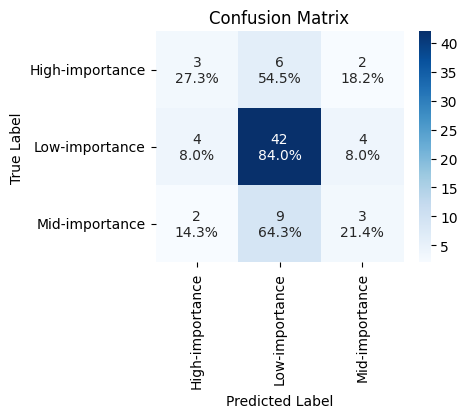

In [178]:
labels = sorted(classifier_df['category'].unique())
plot_confusion_matrix_with_percentages(y_test, preds, labels=labels)